In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from config.config import K, Na, max_err
from src.star_class import *

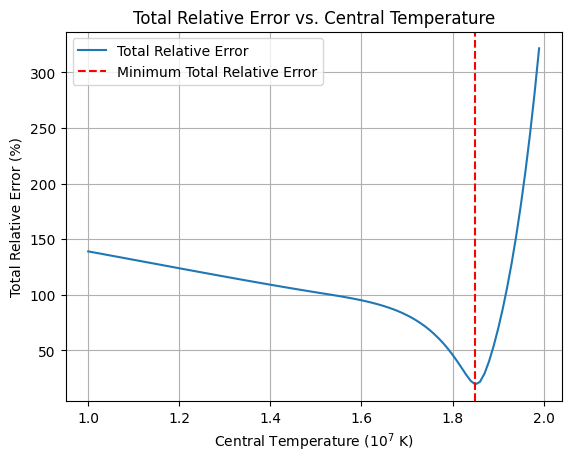

Central Temperature that minimizes the Total Relative Error (K): 1.8500000000000008
Minimum Total Relative Error (%): 19.399915694464582


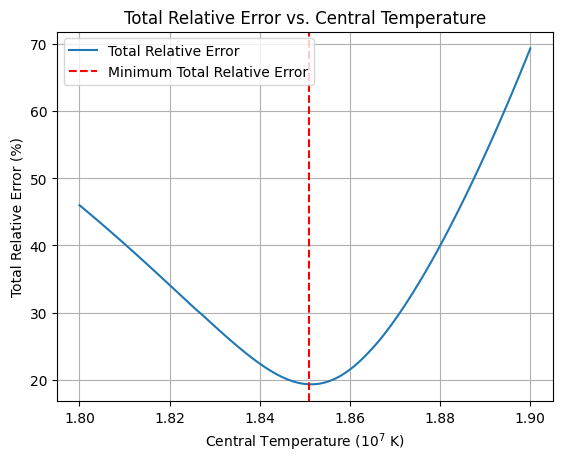

Central Temperature that minimizes the Total Relative Error (K): 1.850999999999995
Minimum Total Relative Error (%): 19.349594891628698


In [9]:
M = 5
X = 0.75
Y = 0.2
T_central = 1.5
R_total = 12
L_total = 40

star = StellarModel(M, X, Y, T_central, R_total, L_total)
T_values = np.arange(star.T_central - 0.5, star.T_central + 0.5, 0.01)
star.optimal_temperature_calculation(T_values, plot=True)
T_values = np.arange(star.T_central - 0.05, star.T_central + 0.05, 0.001)
star.optimal_temperature_calculation(T_values, plot=True)

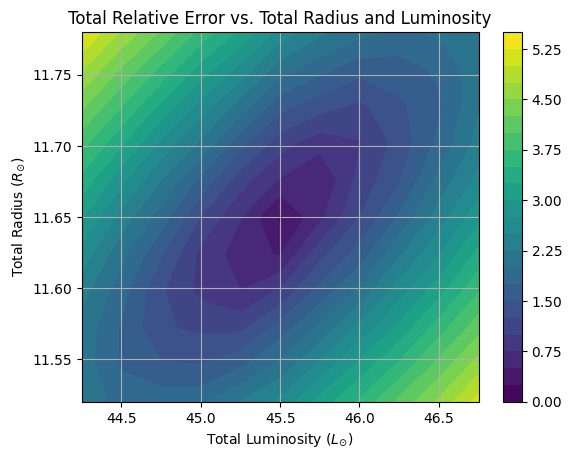

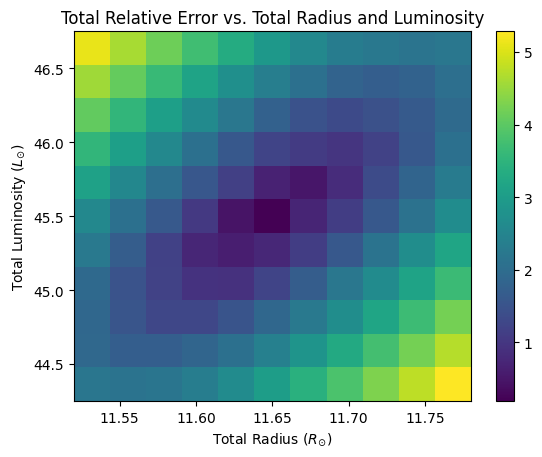

In [3]:
R_values = np.linspace(11.52, 11.78, 11)
L_values = np.linspace(44.25, 46.75, 11)
matrix_error = star.optimal_grid_calculation(R_values, L_values, T_values)
star.plot_matrix_error(matrix_error, R_values, L_values, "contour")
star.plot_matrix_error(matrix_error, R_values, L_values, "pixels")

In [4]:
print(L_values)
print(R_values)

[44.25 44.5  44.75 45.   45.25 45.5  45.75 46.   46.25 46.5  46.75]
[11.52  11.546 11.572 11.598 11.624 11.65  11.676 11.702 11.728 11.754
 11.78 ]


In [5]:
# Identificar las 4 celdas centrales
R_center_range = (R_values[3], R_values[7])
L_center_range = (L_values[3], L_values[7])

# Crear un grid más fino en las celdas centrales con un número arbitrario de puntos, por ejemplo 11 puntos también
R_fine = np.linspace(R_center_range[0], R_center_range[1], 11)
L_fine = np.linspace(L_center_range[0], L_center_range[1], 11)

matrix_error = star.optimal_grid_calculation(R_fine, L_fine, T_values)

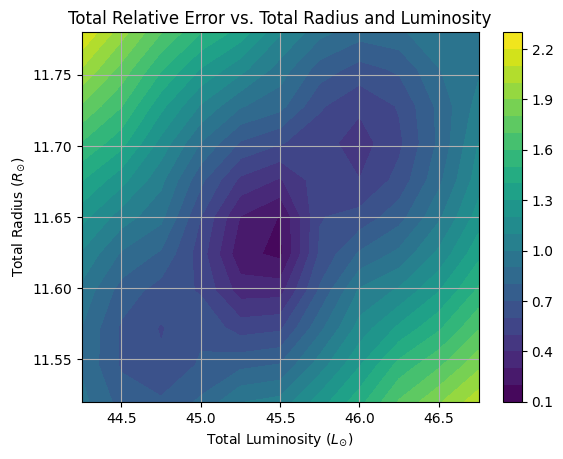

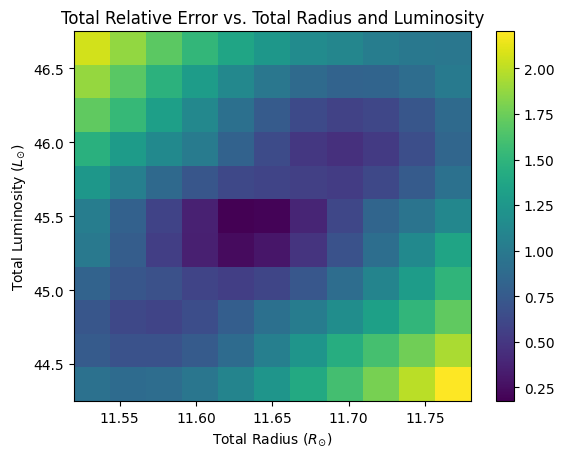

In [6]:
star.plot_matrix_error(matrix_error, R_values, L_values, "contour")
star.plot_matrix_error(matrix_error, R_values, L_values, "pixels")

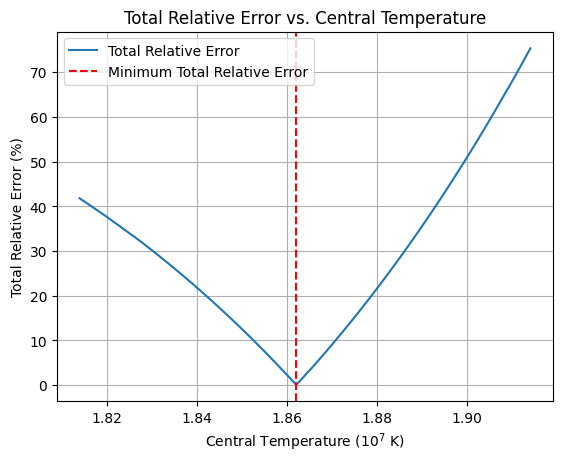

Central Temperature that minimizes the Total Relative Error (K): 1.8620999999999883
Minimum Total Relative Error (%): 0.15108856249342098


In [7]:
T_values = np.arange(star.T_central - 0.05, star.T_central + 0.05, 0.0001)
star.optimal_temperature_calculation(T_values, True)

In [8]:
# Crear un DataFrame con un diccionario donde las claves son los nombres de las columnas
df = pd.DataFrame({
    'r': star.R,
    'P': star.P,
    'T': star.T,
    'L': star.L,
    'M': star.M,
})

# Usar .style.format para especificar formatos individuales
formatted_df = df.style.format({
    'r': "{:.5f}",  # Dos decimales para 'r'
    'P': "{:,.7f}",  # Sin decimales para 'P', con comas para los millares
    'T': "{:.7f}",  # Tres decimales para 'T'
    'L': "{:.6f}",  # Cinco decimales para 'L'
    'M': "{:.6f}"   # Ocho decimales para 'M'
})

# Mostrar el DataFrame
# formatted_df

In [9]:
# We show the whole DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
print(df)

             r             P         T          L         M
0     0.000000  7.774527e+01  1.914000   0.000000  0.000000
1     0.104756  7.761293e+01  1.912696   0.097885  0.000142
2     0.209513  7.721671e+01  1.908784   0.783080  0.001132
3     0.314269  7.655377e+01  1.902212   2.465648  0.003871
4     0.419026  7.563074e+01  1.893005   5.473698  0.009105
5     0.523782  7.446379e+01  1.881267   9.894271  0.017617
6     0.628538  7.306539e+01  1.867055  15.605463  0.030151
7     0.733295  7.144894e+01  1.850421  22.312689  0.047402
8     0.838051  6.962941e+01  1.831426  29.610398  0.070007
9     0.942808  6.762335e+01  1.810135  37.054167  0.098538
10    1.047564  6.544869e+01  1.786622  44.228151  0.133497
11    1.152320  6.312450e+01  1.760968  50.796309  0.175310
12    1.257077  6.067071e+01  1.733261  56.531250  0.224320
13    1.361833  5.810782e+01  1.703594  61.320357  0.280788
14    1.466590  5.545666e+01  1.672068  65.153405  0.344887
15    1.571346  5.273805e+01  1.638785  

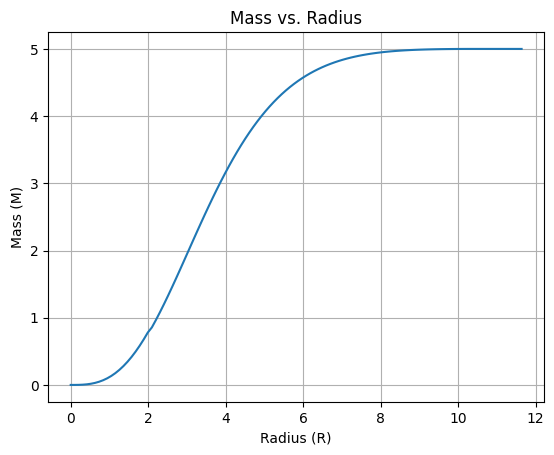

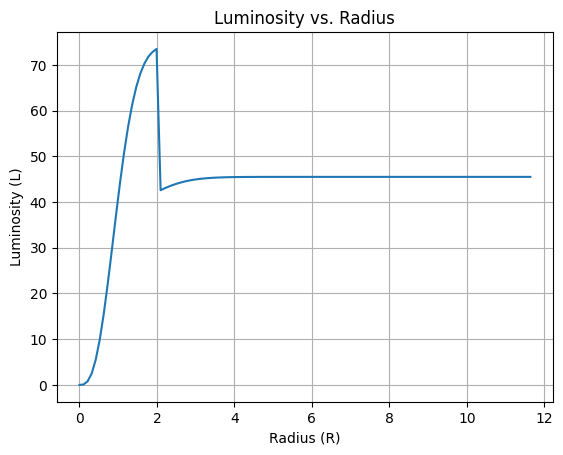

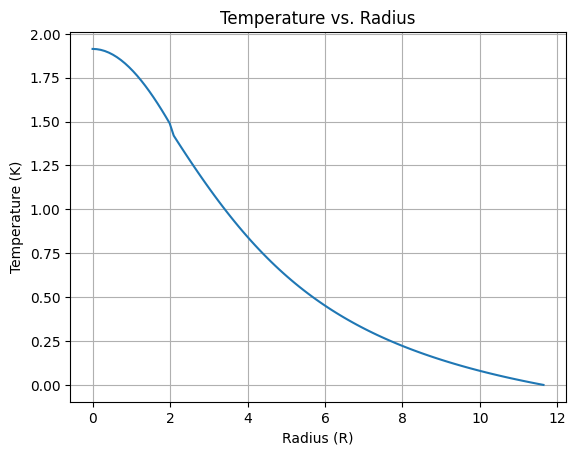

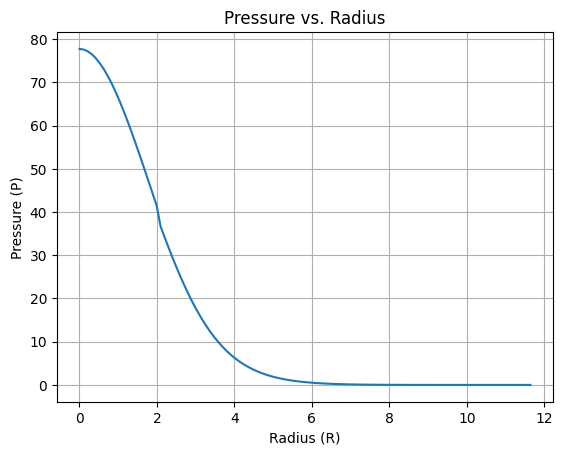

In [10]:
# we make the plot of the complete model of the star, R vs M, R vs L, R vs T, R vs P
plt.figure()
plt.plot(star.R, star.M)
plt.xlabel('Radius (R)')
plt.ylabel('Mass (M)')
plt.title('Mass vs. Radius')
plt.grid()
plt.show()

plt.figure()
plt.plot(star.R, star.L)
plt.xlabel('Radius (R)')
plt.ylabel('Luminosity (L)')
plt.title('Luminosity vs. Radius')
plt.grid()
plt.show()

plt.figure()
plt.plot(star.R, star.T)
plt.xlabel('Radius (R)')
plt.ylabel('Temperature (K)')
plt.title('Temperature vs. Radius')
plt.grid()
plt.show()

plt.figure()
plt.plot(star.R, star.P)
plt.xlabel('Radius (R)')
plt.ylabel('Pressure (P)')
plt.title('Pressure vs. Radius')
plt.grid()
plt.show()